# Homework 1 Problem 6

Darius Dice conducts an experiment in which he rolls a fair six-sided die. If he rolls any number other than a 6, he records the result and rolls the die again. If he rolls a 6, he records the result and stops. If Darius rolls the die 10 times in a row without rolling a 6, he becomes bored and stops anyway. To show your work below, submit your code as well as any derivations.

(a) What is the probability that Darius rolls at least one 6? Derive an equation for this probability, and also compute its numeric value.

*Answer*: The result each time is independent. Since probability of get six in one trial is 1/6, the probability of getting no 6 in 10 trails will be $(1-1/6)^{10}$. Therefore, the probability of getting at least one six will be $(1-(1-1/6)^{10})$.

In [1]:
print("The probability that Darius rolls at least one 6 is:", 1-(1-1/6)**10)

The probability that Darius rolls at least one 6 is: 0.8384944171101543


(b) Write a program to determine the probability that Darius rolls at least one 5 by counting the number of outcomes where this occurs. Hint: You can verify your code by hand-checking the result for a smaller maximum number of die rolls.

*Answer*: Besides codes, we also derive the possibility here.
- The probability that the first result is 6 is $1/6$
- The probability that the second result is 6 is $5/6*1/6$
- The probability that the n-th result is 6 is $(5/6)^{n-1}*(1/6)$, $n \leq 10$
- The probability that getting no six after n trials is $(5/6)^{n}$

The probability of getting no 5 is:
$\sum_{i=0}^{9} (4/6)^{i}*(1/6) + (4/6)^{10}$

Therefore, theoretically, the probability of getting at least one 5 is:
$1 - \sum_{i=0}^{9} (4/6)^{i}*(1/6) - (4/6)^{10}$

We first write codes to calculate this number.

In [3]:
prob = 1 - (4/6)**10
for i in range(10):
    prob -= (1/6) * (4/6)**i
print('The theoretical probability of getting at least one 5 is', prob)

The theoretical probability of getting at least one 5 is 0.491329235042084


We further use permutation & counting in codes to get & verify the probability.

In [4]:
from itertools import product

dice = [1,2,3,4,5,6]

def cal_prob_b(n):
    temp = [dice for _ in range(n)]
    res = list(product(*temp))
    sample_size = len(res)
    count = 0
    
    for sequence in res:
        if 6 in sequence:
            if 5 in sequence:
                if sequence.index(5) < sequence.index(6):
                    count += 1
        else:
            if 5 in sequence:
                count += 1
    prob_b  = count / sample_size
    
    print('Number of trial:', n)
    print('Sample space size:', sample_size)
    print('Total count', count)
    
    return prob_b
                 
n = 10
prob =  cal_prob_b(n)
print('The simulated probability of getting at least one 5 is', prob)

Number of trial: 10
Sample space size: 60466176
Total count 29708800
The simulated probability of getting at least one 5 is 0.4913292350420837


(c) Write a program to determine the probability that Darius rolls strictly more 4s than 3s.

In [17]:
def cal_prob_c(n):
    temp = [dice for _ in range(n)]
    res = list(product(*temp))
    sample_size = len(res)
    count = 0
    
    for sequence in res:
        if 6 in sequence:
            index_6 = sequence.index(6)
            if sequence[:index_6].count(4) > sequence[:index_6].count(3):
                count += 1
        else:
            if sequence.count(4) > sequence.count(3):
                count += 1
                
    prob_c  = count / sample_size
    print('Number of trial:', n)
    print('Sample space size:', sample_size)
    print('Total count:', count)
    
    return prob_c

In [18]:
n = 10
prob =  cal_prob_c(n)
print('The simulated probability that Darius rolls strictly more 4s than 3s is', prob)

Number of trial: 10
Sample space size: 60466176
Total count: 16566000
The simulated probability that Darius rolls strictly more 4s than 3s is 0.27397135218208607


(d) Ten die rolls can sum to at most 60. Let R denote the sum of the ten rolls. What is the range of possible sums of rolls (the sample space!) that Darius can achieve? Compute and plot the probabilities that the sum of Darius’s rolled dice equal each integer in that range.

In [26]:
import matplotlib.pyplot as plt
from collections import OrderedDict

def cal_prob_d(n):
    temp = [dice for _ in range(n)]
    res = list(product(*temp))
    sample_size = len(res)
    sum_count = {}
    
    for sequence in res:
        if 6 in sequence:
            index_6 = sequence.index(6)
            sum_i = sum(sequence[:index_6+1])
        else:
            sum_i = sum(sequence)
        if sum_i in sum_count:
            sum_count[sum_i] += 1
        else:
            sum_count[sum_i] = 1
    
    sum_count = OrderedDict(sorted(sum_count.items()))
    prob_d = {k: v / sample_size for k, v in sum_count.items()}
             
    print(f'The range of sum of {n} trial is:', 
          f'min={min(sum_count)}', f'max={max(sum_count)}')
    print('Possible sum (sample space)', sum_count.keys())
    
    return prob_d

In [39]:
n = 10
prob =  cal_prob_d(n)

The range of sum of 10 trial is: min=6 max=51
Possible sum (sample space) odict_keys([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])


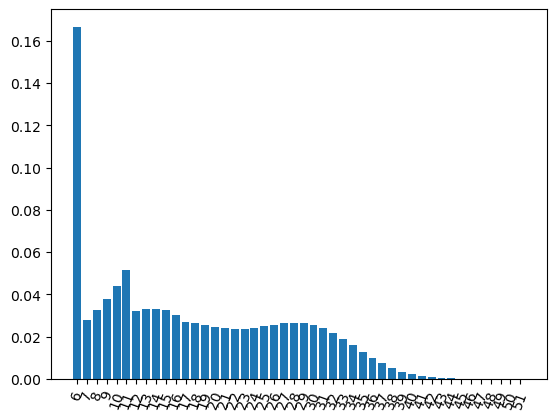

In [40]:
plt.bar(range(len(prob)), prob.values(), align='center')
plt.xticks(range(len(prob)), list(prob.keys()), rotation=70)
plt.show()

(e) Eli rolls dice similarly, but stops if he rolls a 1 (or after 10 rolls). What is the range of possible sums that Eli can roll? Compute and plot the probability that the sum of Eli’s dice equals each integer in that range.

In [30]:
def cal_prob_e(n):
    temp = [dice for _ in range(n)]
    res = list(product(*temp))
    sample_size = len(res)
    sum_count = {}
    
    for sequence in res:
        if 1 in sequence:
            index_1 = sequence.index(1)
            sum_i = sum(sequence[:index_1+1])
        else:
            sum_i = sum(sequence)
        if sum_i in sum_count:
            sum_count[sum_i] += 1
        else:
            sum_count[sum_i] = 1
             
    sum_count = OrderedDict(sorted(sum_count.items()))
    prob_e = {k: v / sample_size for k, v in sum_count.items()}
             
    print(f'The range of sum of {n} trial is:', 
          f'min={min(sum_count)}', f'max={max(sum_count)}')
    print('Possible sum (sample space)', sum_count.keys())
    
    return prob_e

In [37]:
n = 10
prob =  cal_prob_e(n)

The range of sum of 10 trial is: min=1 max=60
Possible sum (sample space) odict_keys([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])


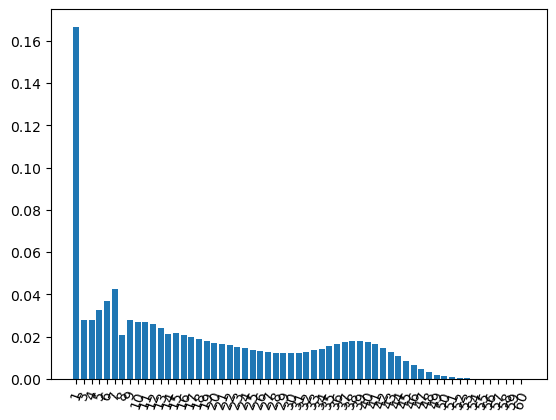

In [38]:
plt.bar(range(len(prob)), prob.values(), align='center')
plt.xticks(range(len(prob)), list(prob.keys()), rotation=70)
plt.show()

(f) Eli challenges Darius to a game in which they each roll dice as described above, and the winner is the person who rolls the sum closest to some target integer x, without going over. If they roll the same sum, or both go over, no one wins. Compute and plot the probability that Darius wins, and the probability that Eli wins, for all targets 1, 2, ..., 60. Attach your plot below.

In [34]:
n = 10

print('Eli')
prob_eli =  cal_prob_e(n)

print('Darius')
prob_darius = cal_prob_d(n)

targets = list(range(1, 61))

# Eli wins iff her sum > darius's sum & <= target
eli_winning = [0] * 61

# Darius wins iff his sum > Eli's & <= target
darius_winning = [0] * 61

for target in targets:
    eli_wins = 0
    darius_wins = 0
    for eli_sum in prob_eli.keys():
        for darius_sum in prob_darius.keys():
            if eli_sum <= target and darius_sum <=target:
                if eli_sum > darius_sum:
                    eli_wins += prob_eli[eli_sum] * prob_darius[darius_sum]
                elif eli_sum < darius_sum:
                    darius_wins += prob_eli[eli_sum] * prob_darius[darius_sum]
            elif eli_sum <= target < darius_sum:
                eli_wins += prob_eli[eli_sum] * prob_darius[darius_sum]
            elif darius_sum <= target < eli_sum:
                darius_wins += prob_eli[eli_sum] * prob_darius[darius_sum]
            else:
                pass
    eli_winning[target] = eli_wins / (eli_wins+darius_wins)
    darius_winning[target] = darius_wins / (eli_wins+darius_wins)

Eli
The range of sum of 10 trial is: min=1 max=60
Possible sum (sample space) odict_keys([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])
Darius
The range of sum of 10 trial is: min=6 max=51
Possible sum (sample space) odict_keys([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])


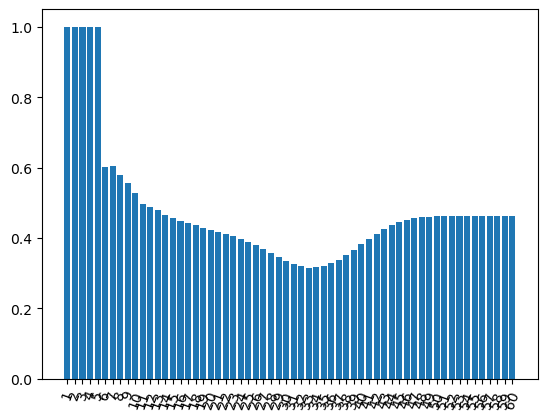

[1.0, 1.0, 1.0, 1.0, 1.0, 0.6022944550669218, 0.6054214037395473, 0.5789088696886523, 0.5566481867540264, 0.5289550496692856, 0.4969560837530901, 0.488627276469571, 0.4785154935430935, 0.4662858310272296, 0.45618322064538225, 0.4474273419285134, 0.44153657038356253, 0.4355508849810353, 0.42959396151573537, 0.42377169031901735, 0.4182131397989165, 0.41232647917685017, 0.4056068145943054, 0.3978612842520211, 0.38900140383661624, 0.3790512155643581, 0.36819170543689056, 0.3567710191417895, 0.3454159566408538, 0.3348736315168406, 0.3259634756096412, 0.3194793734229145, 0.3160978939587619, 0.31629157864120505, 0.32026146037957004, 0.32789292052501445, 0.33876033131865185, 0.3521670358558443, 0.3672246099745594, 0.38295814180547594, 0.39842193654348057, 0.4128035270332731, 0.42550067543954134, 0.4361587953934661, 0.4446681659093708, 0.4511268094101877, 0.45578121346862593, 0.45895956898832724, 0.46101064263950753, 0.4622570407111572, 0.4629670058843564, 0.46334386400310573, 0.463528867079582

In [35]:
# Eli's winning prob plot
plt.bar(range(len(targets)), eli_winning[1:], align='center')
plt.xticks(range(len(targets)), targets, rotation=70)
plt.show()

print(eli_winning[1:])

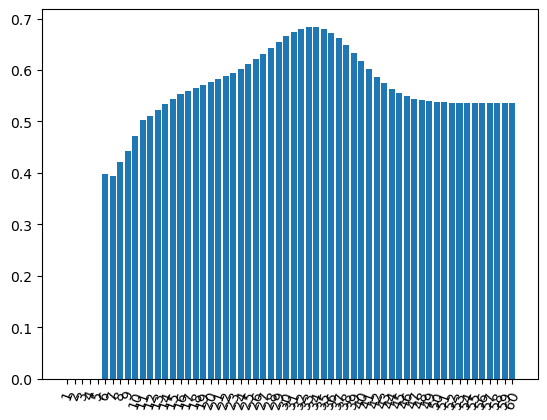

[0.0, 0.0, 0.0, 0.0, 0.0, 0.3977055449330783, 0.3945785962604527, 0.42109113031134765, 0.4433518132459736, 0.4710449503307144, 0.5030439162469099, 0.511372723530429, 0.5214845064569066, 0.5337141689727705, 0.5438167793546178, 0.5525726580714867, 0.5584634296164374, 0.5644491150189647, 0.5704060384842646, 0.5762283096809827, 0.5817868602010835, 0.5876735208231498, 0.5943931854056946, 0.602138715747979, 0.6109985961633838, 0.6209487844356418, 0.6318082945631094, 0.6432289808582105, 0.6545840433591462, 0.6651263684831593, 0.6740365243903588, 0.6805206265770855, 0.6839021060412381, 0.683708421358795, 0.67973853962043, 0.6721070794749855, 0.6612396686813481, 0.6478329641441557, 0.6327753900254406, 0.6170418581945241, 0.6015780634565195, 0.587196472966727, 0.5744993245604586, 0.563841204606534, 0.5553318340906291, 0.5488731905898123, 0.544218786531374, 0.5410404310116728, 0.5389893573604925, 0.5377429592888429, 0.5370329941156436, 0.5366561359968942, 0.5364711329204171, 0.5363879957354324, 0

In [36]:
# Darius's winning prob plot
plt.bar(range(len(targets)), darius_winning[1:], align='center')
plt.xticks(range(len(targets)), targets, rotation=70)
plt.show()

print(darius_winning[1:])